# 전국 어린이집 표준데이터
* https://www.data.go.kr/dataset/3035522/fileData.do

In [0]:
# 추가 설치 
!pip install plotnine
!pip install folium

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
from plotnine import *
import re
from plotnine import *




In [4]:
%pwd
#참고 : 서버 명령어 기재시 % 입력 후 서버 명령어 활용

'/content'

In [9]:
# 로컬 파일 업로드 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 전국어린이집표준데이터.csv to 전국어린이집표준데이터.csv
User uploaded file "전국어린이집표준데이터.csv" with length 6986572 bytes


In [10]:
%ls -alrt

total 23428
drwxr-xr-x 2 root root     4096 Aug 15 20:56 sample_data/
lrwxrwxrwx 1 root root        8 Aug 15 20:56 datalab -> /content/
drwxr-xr-x 1 root root     4096 Aug 20 19:36 ../
drwxr-xr-x 4 root root     4096 Aug 20 19:37 .forever/
drwx------ 3 root root     4096 Aug 20 19:37 .local/
drwxr-xr-x 5 root root     4096 Aug 21 02:12 .ipython/
drwxr-xr-x 1 root root     4096 Aug 21 02:12 .config/
drwx------ 4 root root     4096 Aug 21 02:12 .cache/
-rw-r--r-- 1 root root 16964608 Aug 21 04:42 전국어린이집표준데이터.xls
drwxr-xr-x 1 root root     4096 Aug 21 04:43 ./
-rw-r--r-- 1 root root  6986572 Aug 21 04:44 전국어린이집표준데이터.csv


In [131]:
pre_sale = pd.read_csv('전국어린이집표준데이터.csv', encoding='euc-kr')
pre_sale.shape

(43429, 18)

In [132]:
pre_sale.head(3)
#참고 : 머리 - 윗 부분 자료 검색

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,위도,경도,Unnamed: 17
0,e-편한세상2단지어린이집,울산광역시,동구,민간,35,9.0,울산광역시 동구 봉수로 290 e-편한세상2단지어린이집(전하동),052-234-2273,052-234-2274,4,0,5,Y,http://www.childcare.go.kr,2018-01-01,35.512506,129.423556,NaN
1,e-편한세상어린이집,울산광역시,동구,민간,43,9.0,울산광역시 동구 봉수로 290 e-편한세상 관리동 어린이집(전하동),052-233-6711,052-233-6711,5,0,5,N,http://www.childcare.go.kr,2018-01-01,35.512506,129.423556,NaN
2,i예담어린이집,울산광역시,동구,민간,59,11.0,울산광역시 동구 월봉1길 26 (방어동),052-201-5857,052-201-5857,8,2,12,Y,http://www.childcare.go.kr,2018-01-01,35.488844,129.419293,NaN


In [133]:
pre_sale.tail(10)
#참고: 꼬리 - 뒷 부분 자료 검색

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,위도,경도,Unnamed: 17
43419,초롱별어린이집,인천광역시,부평구,가정,13,3.0,"인천광역시 부평구 경인로1118번길 67 110동 101호(일신동, 일신주공아파트)",032-504-4606,NaN,3,0,4,N,NaN,2017-01-17,37.482139,126.742909,NaN
43420,친구사랑어린이집,인천광역시,부평구,가정,20,5.0,"인천광역시 부평구 부평문화로 37 10동 104호(부평동, 동아1차아파트)",032-523-9605,NaN,3,0,4,N,NaN,2017-01-17,37.492770,126.719081,NaN
43421,커가는꿈나무어린이집,인천광역시,부평구,민간,37,12.0,인천광역시 부평구 부흥북로35번길 14 (부평동),032-506-4799,NaN,5,0,6,N,NaN,2017-01-17,37.501956,126.726153,NaN
43422,코람데오어린이집,인천광역시,부평구,가정,20,6.0,"인천광역시 부평구 체육관로 57 601동 101호(삼산동, 삼산타운6단지)",032-277-1035,NaN,3,0,4,Y,NaN,2017-01-17,37.508692,126.737670,NaN
43423,코코어린이집,인천광역시,부평구,가정,13,3.0,"인천광역시 부평구 부개로 11 505동 102호(부개동, 부개주공5단지아파트)",032-330-9647,NaN,3,0,4,N,NaN,2017-01-17,37.499394,126.737567,NaN
43424,크니크니어린이집,인천광역시,부평구,가정,14,3.0,"인천광역시 부평구 굴포로 81 101동 101호(갈산동, 주공1단지아파트)",032-264-6004,NaN,2,0,3,N,NaN,2017-01-17,37.511968,126.730904,NaN
43425,큰나무어린이집,인천광역시,부평구,가정,20,5.0,"인천광역시 부평구 안남로 272 101동 101호 (청천동, 금호아파트)",070-8887-0053,NaN,3,0,4,N,NaN,2017-01-17,37.506564,126.710723,NaN
43426,큰별아이어린이집,인천광역시,부평구,민간,93,14.0,인천광역시 부평구 안남로253번길 44 (4층 건물전체) (산곡동),032-330-1500,NaN,6,1,11,Y,NaN,2017-01-17,37.506155,126.706757,NaN
43427,큰별어린이집,인천광역시,부평구,가정,13,6.0,"인천광역시 부평구 길주남로 143 109동 101호(부개동, 부개주공1단지아파트)",032-361-5146,NaN,3,0,4,N,NaN,2017-01-17,37.505259,126.738012,NaN
43428,큰빛어린이집,인천광역시,부평구,민간,46,9.0,인천광역시 부평구 길주남로102번길 11-9 (2층 건물전체) (부평동),032-361-3020,NaN,6,0,8,Y,NaN,2017-01-17,37.503598,126.733562,NaN


In [134]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43429 entries, 0 to 43428
Data columns (total 18 columns):
어린이집명          43429 non-null object
시도명            43429 non-null object
시군구명           43429 non-null object
어린이집유형구분       43429 non-null object
정원수            43429 non-null int64
보육교직원수         41378 non-null float64
소재지도로명주소       43429 non-null object
어린이집전화번호       43424 non-null object
어린이집팩스번호       19669 non-null object
보육실수           30141 non-null object
놀이터수           25156 non-null object
CCTV설치수        30772 non-null object
통학차량운영여부       34371 non-null object
홈페이지주소         5220 non-null object
데이터기준일자        43429 non-null object
위도             31789 non-null float64
경도             31789 non-null float64
Unnamed: 17    0 non-null float64
dtypes: float64(4), int64(1), object(13)
memory usage: 6.0+ MB


In [136]:
pre_sale_clean = pre_sale.drop(columns=['어린이집팩스번호','소재지도로명주소','어린이집전화번호','시군구명','보육실수','놀이터수','홈페이지주소','어린이집팩스번호','CCTV설치수','데이터기준일자','소재지도로명주소','통학차량운영여부','Unnamed: 17'])


pre_sale_clean2 = pre_sale_clean.drop(columns=[[7]], axix=1)


pre_sale_clean2.info()
pre_sale_clean2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43429 entries, 0 to 43428
Data columns (total 8 columns):
어린이집명          43429 non-null object
시도명            43429 non-null object
어린이집유형구분       43429 non-null object
정원수            43429 non-null int64
보육교직원수         41378 non-null float64
위도             31789 non-null float64
경도             31789 non-null float64
Unnamed: 17    0 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.7+ MB


Index(['어린이집명', '시도명', '어린이집유형구분', '정원수', '보육교직원수', '위도', '경도', 'Unnamed: 17'], dtype='object')

Index(['어린이집명', '시도명', '어린이집유형구분', '정원수', '보육교직원수', '위도', '경도', 'Unnamed: 17'], dtype='object')

In [117]:
pre_sale_clean.head(20)

,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,위도,경도,Unnamed: 17
0,e-편한세상2단지어린이집,울산광역시,민간,35,9.0,35.512506,129.423556,NaN
1,e-편한세상어린이집,울산광역시,민간,43,9.0,35.512506,129.423556,NaN
2,i예담어린이집,울산광역시,민간,59,11.0,35.488844,129.419293,NaN
3,THE자람어린이집,울산광역시,민간,41,8.0,35.492059,129.419641,NaN
4,가온어린이집,울산광역시,가정,19,5.0,35.517116,129.426247,NaN
5,고은솔어린이집,울산광역시,가정,19,4.0,35.528267,129.432848,NaN
6,구름빵어린이집,울산광역시,가정,14,4.0,35.546838,129.425613,NaN
7,꼬마대통령어린이집,울산광역시,민간,49,9.0,35.503181,129.420755,NaN
8,꼬마또래어린이집,울산광역시,민간,38,5.0,35.482306,129.411025,NaN
9,꼬마별어린이집,울산광역시,가정,13,5.0,35.527429,129.429737,NaN


In [95]:
pre_sale_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43428
Data columns (total 18 columns):
어린이집명          43428 non-null object
시도명            43428 non-null object
시군구명           43428 non-null object
어린이집유형구분       43428 non-null object
정원수            43428 non-null int64
보육교직원수         41377 non-null float64
소재지도로명주소       43428 non-null object
어린이집전화번호       43423 non-null object
어린이집팩스번호       19668 non-null object
보육실수           30140 non-null object
놀이터수           25155 non-null object
CCTV설치수        30771 non-null object
통학차량운영여부       34370 non-null object
홈페이지주소         5219 non-null object
데이터기준일자        43428 non-null object
위도             31788 non-null float64
경도             31788 non-null float64
Unnamed: 17    0 non-null float64
dtypes: float64(4), int64(1), object(13)
memory usage: 6.3+ MB


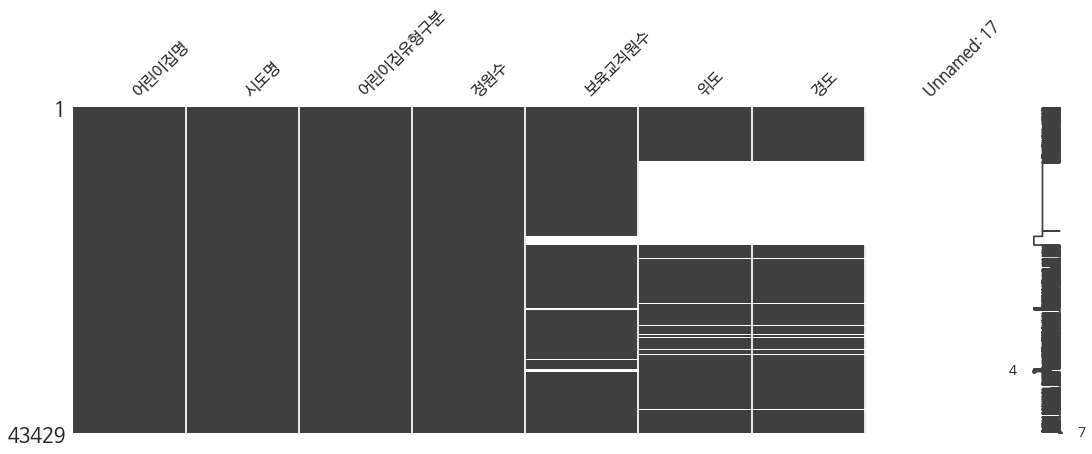

In [137]:
import  missingno  as msno

msno.matrix(pre_sale_clean, figsize=(18,6))

In [138]:
pre_sale_clean.columns

Index(['어린이집명', '시도명', '어린이집유형구분', '정원수', '보육교직원수', '위도', '경도', 'Unnamed: 17'], dtype='object')

In [0]:

#한글 

#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [84]:
pre_sale_clean.isnull().sum()

어린이집명              0
시도명                0
시군구명               0
어린이집유형구분           0
정원수                0
보육교직원수          2051
소재지도로명주소           0
어린이집전화번호           5
통학차량운영여부        9058
데이터기준일자            0
위도             11640
경도             11640
Unnamed: 17    43429
dtype: int64

In [161]:
pre_sale_clean.describe()


,정원수,보육교직원수,위도,경도,Unnamed: 17
count,43429.000000,41378.000000,31789.000000,31789.000000,0.0
mean,43.395266,7.874595,36.134339,127.770968,NaN
std,39.931992,5.035621,1.032709,0.936334,NaN
min,0.000000,0.000000,33.214438,124.663775,NaN
25%,19.000000,5.000000,35.229622,126.948985,NaN
50%,20.000000,6.000000,35.873497,127.402924,NaN
75%,53.000000,10.000000,37.372355,128.689469,NaN
max,489.000000,71.000000,38.495819,130.908834,NaN


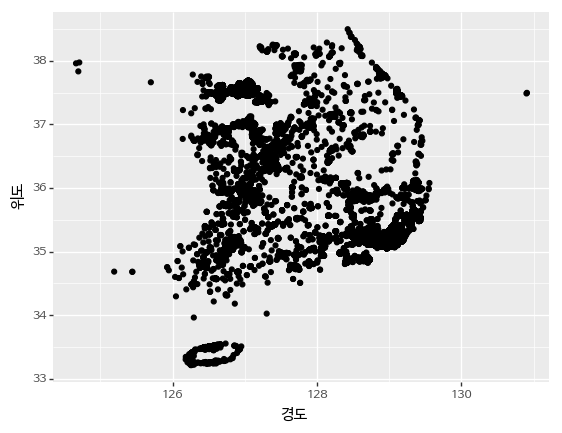

<ggplot: (-9223363258254287279)>

In [141]:
(ggplot(pre_sale_clean)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
pre_sale_clean_seoul = pre_sale_clean.loc[pre_sale_clean['시도명'] == '서울특별시']

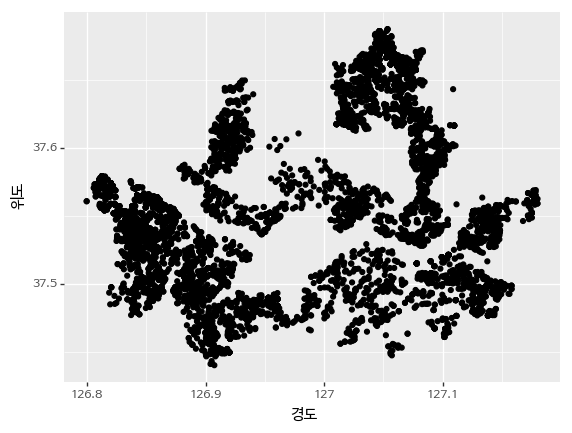

<ggplot: (8778600237523)>

In [143]:
(ggplot(pre_sale_clean_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

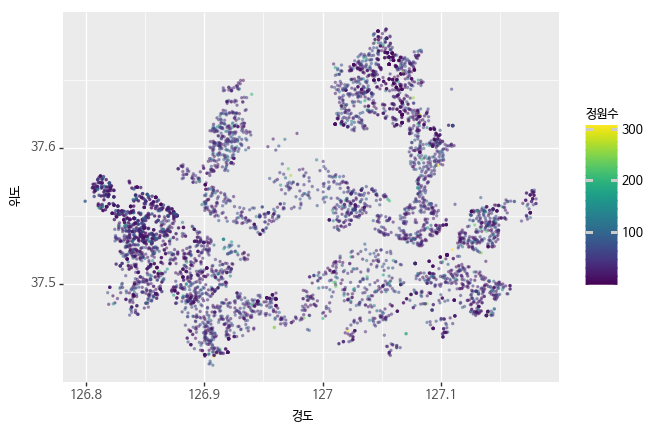

<ggplot: (8778600263919)>

In [159]:
(ggplot(pre_sale_clean_seoul )
 + aes(x='경도', y='위도', color='정원수')
 + geom_point(alpha=0.4, size=0.4)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'green', high = 'red') 
)

In [144]:
pre_sale_clean_seoul.shape

(5636, 8)

In [145]:
pre_sale_clean_seoul.head(100)

,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,위도,경도,Unnamed: 17
430,가연어린이집,서울특별시,가정,18,4.0,37.615827,126.928566,NaN
431,곤지곤지어린이집,서울특별시,가정,17,3.0,37.602024,126.912336,NaN
432,기린어린이집,서울특별시,가정,19,7.0,37.625411,126.929803,NaN
433,기쁨어린이집,서울특별시,가정,19,4.0,37.597919,126.907467,NaN
434,리틀 초콜릿어린이집,서울특별시,가정,19,5.0,NaN,NaN,NaN


## 규모별 전국 평균 분양가격

# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [0]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()


#region_year_all
#참조 loc 는 인덱싱 규모구분 == 전체인 데이터만 저회

#region_year
#년도, 지역으로 정렬 reset_index란 - 재정렬 


연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [0]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)

#금액인 "천원" 단위이르모 "원 단위로 변경"
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년~2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년~2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,335,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 387,000원이다.
전국 평균 변동액은 평당 1,666,647원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,643",482
1,경기,"10,377","11,220","11,850","12,854",2476
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,262",1090
4,광주,"8,052","8,899","9,464","9,630",1577
5,대구,"9,232","10,310","11,456","11,652",2419
6,대전,"8,098","8,502","9,045","9,589",1490
7,부산,"10,307","10,430","11,578","12,710",2402
8,서울,"19,725","20,663","21,376","22,299",2574
9,세종,"8,750","8,860","9,135","10,382",1631


# 연도별 변동 그래프

In [0]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

print(f)

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

버전:  2.1.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /content/.config/matplotlib
캐시 위치:  /content/.cache/matplotlib
설정 파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc
65
['STIXSizeThreeSym', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeOneSym', 'cmsy10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'cmb10', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmmi10', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Serif Display', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXNonUnicode', 'cmr10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXSizeFiveSym', 'DejaVu Serif', 'DejaVu Sans Display', 'cmtt10', 'DejaVu Sans', 'DejaVu Sans', 'cmex10', 'STIXSizeTwoSym', 'DejaVu Serif', 'cmss10', 'DejaVu Serif', 'Liberation Sans', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif'

[]

In [0]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 36.0 MB of archives.
After this operation, 140 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum all 20161025-1 [9,129 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum-extra all 20161025-1 [11.7 MB]
Get:4 http://archive.ubuntu.com/u

In [0]:
!fc-cache -f -v

/bin/sh: 1: fc-cache: not found


In [0]:
!ls -alrt /usr/share/fonts/truetype/nanum/

total 136992
-rw-r--r-- 1 root root  7024632 Oct 29  2011 NanumMyeongjoEco.ttf
-rw-r--r-- 1 root root 10635180 Oct 29  2011 NanumMyeongjoEcoExtraBold.ttf
-rw-r--r-- 1 root root  9809868 Oct 29  2011 NanumMyeongjoEcoBold.ttf
-rw-r--r-- 1 root root  7783984 Oct 29  2011 NanumGothicEco.ttf
-rw-r--r-- 1 root root 11571064 Oct 29  2011 NanumGothicEcoExtraBold.ttf
-rw-r--r-- 1 root root 11021172 Oct 29  2011 NanumGothicEcoBold.ttf
-rw-r--r-- 1 root root  1800792 Oct 21  2016 NanumGothicCoding-Bold.ttf
-rw-r--r-- 1 root root  2779112 Oct 21  2016 NanumGothicCoding.ttf
-rw-r--r-- 1 root root   723640 Feb 20  2017 NanumSquareR.ttf
-rw-r--r-- 1 root root   750932 Feb 20  2017 NanumSquareL.ttf
-rw-r--r-- 1 root root   726684 Feb 20  2017 NanumSquareEB.ttf
-rw-r--r-- 1 root root   733500 Feb 20  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root  3548656 Feb 20  2017 NanumPen.ttf
-rw-r--r-- 1 root root  3839464 Feb 20  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  4788696 Feb 20  2017 NanumMyeongjoExtr

In [0]:
!ls -alrt /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

total 143816
-rw-r--r-- 1 root staff    15704 Aug 15 20:47 STIXSizTwoSymReg.ttf
-rw-r--r-- 1 root staff    12116 Aug 15 20:47 STIXSizTwoSymBol.ttf
-rw-r--r-- 1 root staff    15836 Aug 15 20:47 STIXSizThreeSymReg.ttf
-rw-r--r-- 1 root staff    19760 Aug 15 20:47 STIXSizOneSymReg.ttf
-rw-r--r-- 1 root staff    12556 Aug 15 20:47 STIXSizOneSymBol.ttf
-rw-r--r-- 1 root staff    15972 Aug 15 20:47 STIXSizFourSymReg.ttf
-rw-r--r-- 1 root staff    12228 Aug 15 20:47 STIXSizFourSymBol.ttf
-rw-r--r-- 1 root staff    13656 Aug 15 20:47 STIXSizFiveSymReg.ttf
-rw-r--r-- 1 root staff    59108 Aug 15 20:47 STIXNonUni.ttf
-rw-r--r-- 1 root staff    46752 Aug 15 20:47 STIXNonUniIta.ttf
-rw-r--r-- 1 root staff    30512 Aug 15 20:47 STIXNonUniBol.ttf
-rw-r--r-- 1 root staff    41272 Aug 15 20:47 STIXNonUniBolIta.ttf
-rw-r--r-- 1 root staff   175040 Aug 15 20:47 STIXGeneralItalic.ttf
-rw-r--r-- 1 root staff   237360 Aug 15 20:47 STIXGeneralBol.ttf
-rw-r--r-- 1 root staff   181152 Aug 15 20:47 STIXGeneral

In [0]:
!cp /usr/share/fonts/truetype/nanum/*.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [0]:
# 기본 설정 읽기
import matplotlib.pyplot as plt



#NanumGothic = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')


for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print("{}: {}".format(key, plt.rcParamsDefault[key]))
        
        
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 10      


# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'ImpactWestern', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
mathtext.fontset: dejavusa